In [1]:
import sys
sys.path.append('..')

import warnings
warnings.filterwarnings('ignore')

from wxdata import radar

import matplotlib.pyplot as plt
%matplotlib inline

%env WORKDIR ~/Documents/weatherpy-work


## You are using the Python ARM Radar Toolkit (Py-ART), an open source
## library for working with weather radar data. Py-ART is partly
## supported by the U.S. Department of Energy as part of the Atmospheric
## Radiation Measurement (ARM) Climate Research Facility, an Office of
## Science user facility.
##
## If you use this software to prepare a publication, please cite:
##
##     JJ Helmus and SM Collis, JORS 2016, doi: 10.5334/jors.119



/Users/jitang/anaconda/envs/basemapenv/lib/python3.6/site-packages/urllib3/contrib/pyopenssl.py:46: DeprecationWarning: OpenSSL.rand is deprecated - you should use os.urandom instead
  import OpenSSL.SSL


env: WORKDIR=~/Documents/weatherpy-work


In [2]:
order = radar.Level2Archive()

/Users/jitang/anaconda/envs/basemapenv/lib/python3.6/site-packages/jupyter_client/jsonutil.py:67: DeprecationWarning: Interpreting naive datetime as local 2018-02-03 00:57:49.121346. Please add timezone info to timestamps.
  new_obj[k] = extract_dates(v)


In [3]:
selection = order.select_between('KVNX', '2012-04-15 00:30', '2012-04-15 02:30')
selection.items[:5], len(selection.items)

/Users/jitang/anaconda/envs/basemapenv/lib/python3.6/site-packages/jupyter_client/jsonutil.py:67: DeprecationWarning: Interpreting naive datetime as local 2018-02-03 00:57:52.190274. Please add timezone info to timestamps.
  new_obj[k] = extract_dates(v)


(['2012/04/15/KVNX/KVNX20120415_003224_V06.gz',
  '2012/04/15/KVNX/KVNX20120415_003705_V06.gz',
  '2012/04/15/KVNX/KVNX20120415_004149_V06.gz',
  '2012/04/15/KVNX/KVNX20120415_004630_V06.gz',
  '2012/04/15/KVNX/KVNX20120415_005111_V06.gz'],
 26)

In [4]:
files = selection.download()

/Users/jitang/anaconda/envs/basemapenv/lib/python3.6/site-packages/jupyter_client/jsonutil.py:67: DeprecationWarning: Interpreting naive datetime as local 2018-02-03 00:57:54.484036. Please add timezone info to timestamps.
  new_obj[k] = extract_dates(v)


In [5]:
from matplotlib import animation
from wxdata.plotting import bottom_right_textbox, inset_colorbar

/Users/jitang/anaconda/envs/basemapenv/lib/python3.6/site-packages/jupyter_client/jsonutil.py:67: DeprecationWarning: Interpreting naive datetime as local 2018-02-03 00:57:56.738375. Please add timezone info to timestamps.
  new_obj[k] = extract_dates(v)


In [ ]:
# def bg():
    

In [78]:
def reflectivity_for(file):
    fig = plt.figure(figsize=(14, 14))
    _, display = radar.plot_reflectivity(file, zoom_km=(160, 140))
    timestamp = radar.timestamp_from_filename(file)

    title = 'KVNX Reflectivity (dbZ) {}\nGraphic Created by Jim Tang (@wxmann)'.format(
        timestamp.strftime('%Y-%m-%d %H:%M:%S'))

    bottom_right_textbox(display.basemap.ax, title)
    inset_colorbar(display.plots[0], display.basemap.ax, tickcolor='white', loc=2, width='50%')
#     artists = fig.get_children()
#     display.plots[0].set_animated(True)
#     print(artists)
    fig.set_animated(True)
    
    return fig,

/Users/jitang/anaconda/envs/basemapenv/lib/python3.6/site-packages/jupyter_client/jsonutil.py:67: DeprecationWarning: Interpreting naive datetime as local 2018-02-03 02:28:23.307688. Please add timezone info to timestamps.
  new_obj[k] = extract_dates(v)


/Users/jitang/anaconda/envs/basemapenv/lib/python3.6/site-packages/jupyter_client/jsonutil.py:67: DeprecationWarning: Interpreting naive datetime as local 2018-02-03 02:28:24.675652. Please add timezone info to timestamps.
  new_obj[k] = extract_dates(v)


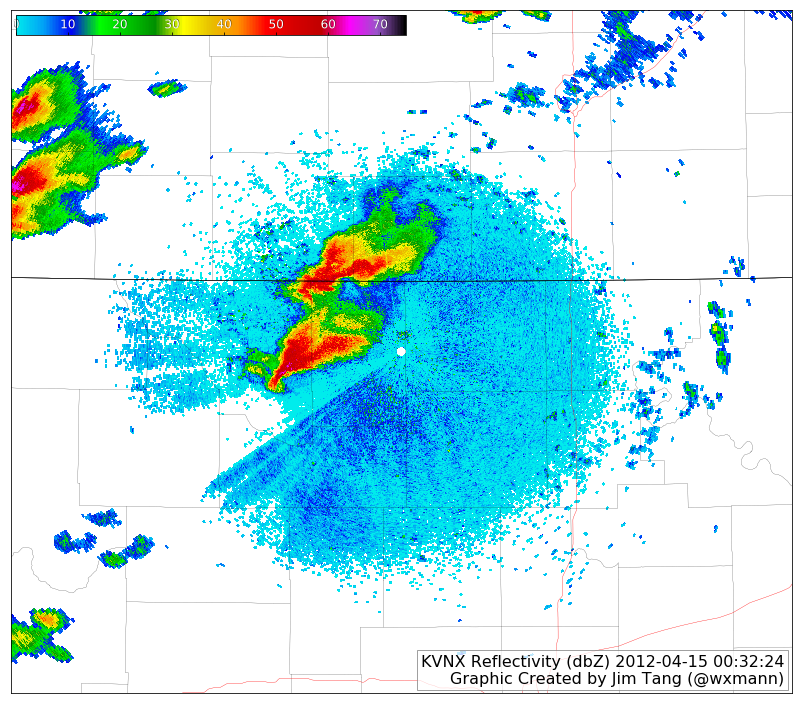

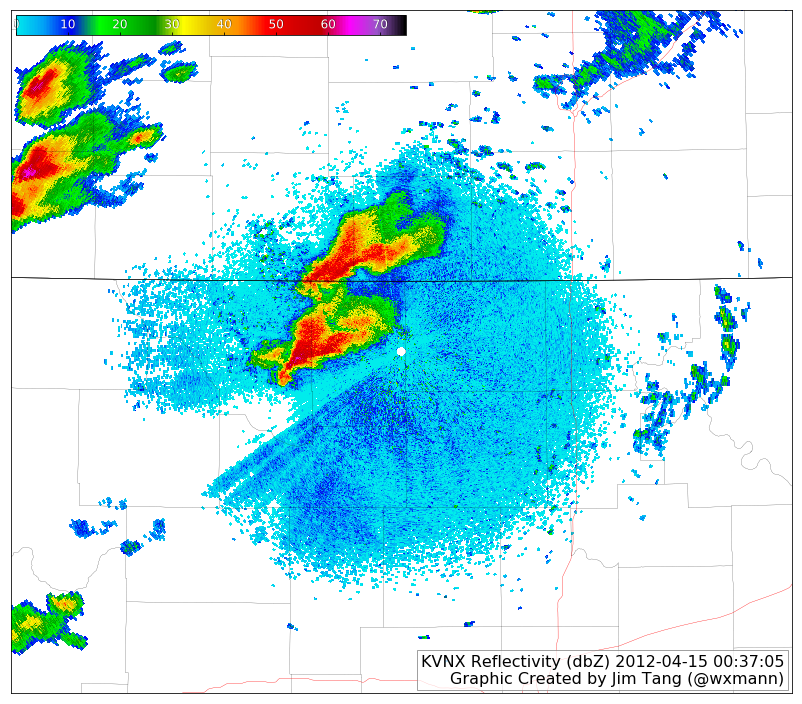

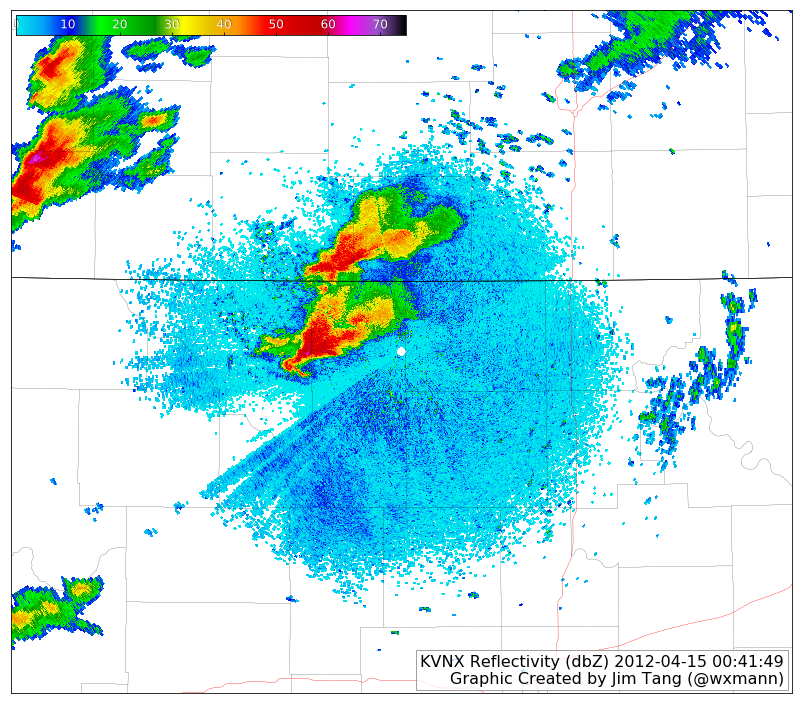

In [79]:
figs = [reflectivity_for(file) for file in files[:3]]

In [80]:
figmajor = plt.figure(figsize=(14, 14))

# anim = animation.FuncAnimation(fig, reflectivity_for, frames=files[:5])

anim = animation.ArtistAnimation(figmajor, figs)

# from matplotlib import rc
# from matplotlib import rcParams
# rc('animation', html='html5')
# rcParams['animation.writer'] = 'avconv'

# from IPython.display import HTML

# print(animation.writers.list())
# HTML(anim.to_html5_video())

/Users/jitang/anaconda/envs/basemapenv/lib/python3.6/site-packages/jupyter_client/jsonutil.py:67: DeprecationWarning: Interpreting naive datetime as local 2018-02-03 02:28:26.207412. Please add timezone info to timestamps.
  new_obj[k] = extract_dates(v)


In [49]:
help(animation.ArtistAnimation
    )

Help on class ArtistAnimation in module matplotlib.animation:

class ArtistAnimation(TimedAnimation)
 |  Animation using a fixed set of `Artist` objects.
 |  
 |  Before creating an instance, all plotting should have taken place
 |  and the relevant artists saved.
 |  
 |  Parameters
 |  ----------
 |  fig : matplotlib.figure.Figure
 |     The figure object that is used to get draw, resize, and any
 |     other needed events.
 |  
 |  artists : list
 |      Each list entry a collection of artists that represent what
 |      needs to be enabled on each frame. These will be disabled for
 |      other frames.
 |  
 |  interval : number, optional
 |     Delay between frames in milliseconds.  Defaults to 200.
 |  
 |  repeat_delay : number, optional
 |      If the animation in repeated, adds a delay in milliseconds
 |      before repeating the animation.  Defaults to ``None``.
 |  
 |  repeat : bool, optional
 |      Controls whether the animation should repeat when the sequence
 |      of 

/Users/jitang/anaconda/envs/basemapenv/lib/python3.6/site-packages/jupyter_client/jsonutil.py:67: DeprecationWarning: Interpreting naive datetime as local 2018-02-03 02:05:58.346958. Please add timezone info to timestamps.
  new_obj[k] = extract_dates(v)


In [81]:
anim.save('/Users/jitang/Documents/weatherpy-work/radar/basic_animation.mp4', writer='ffmpeg', fps=10)

/Users/jitang/anaconda/envs/basemapenv/lib/python3.6/site-packages/jupyter_client/jsonutil.py:67: DeprecationWarning: Interpreting naive datetime as local 2018-02-03 02:28:29.134041. Please add timezone info to timestamps.
  new_obj[k] = extract_dates(v)


AttributeError: 'NoneType' object has no attribute 'canvas'

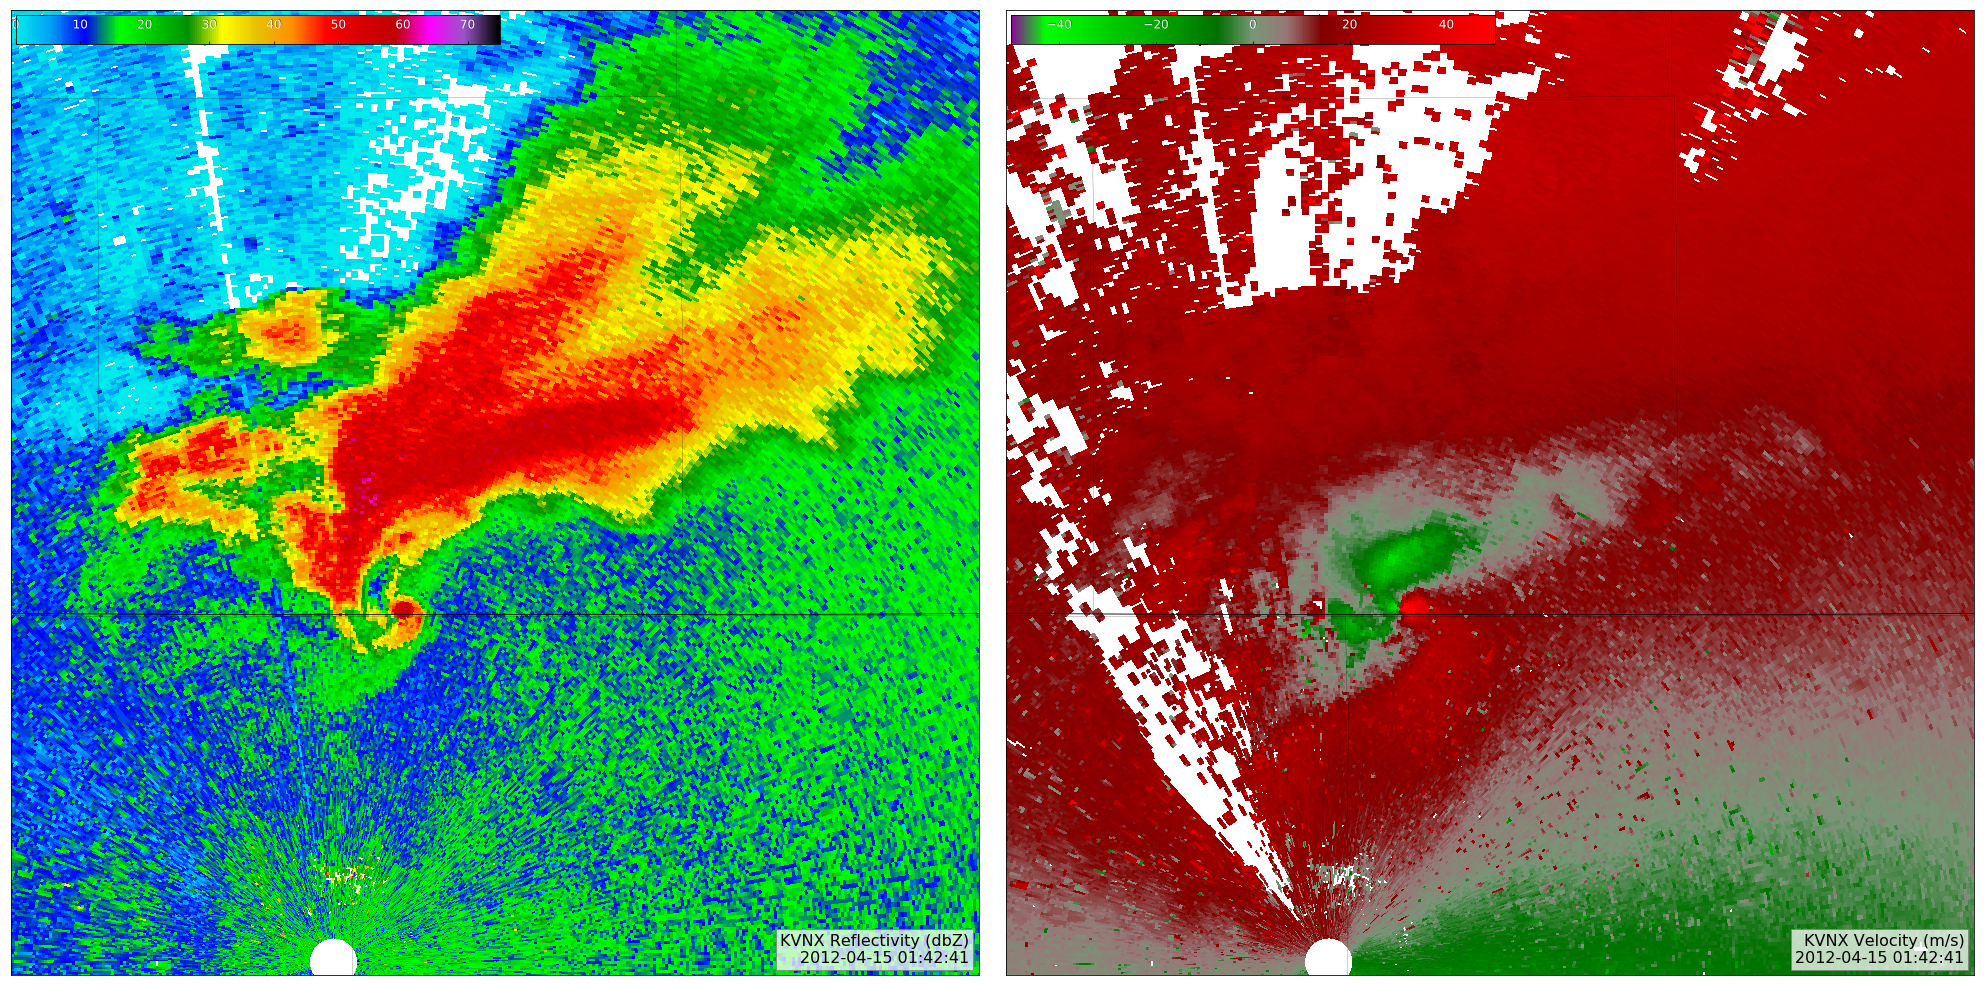

In [46]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(28, 14))
plt.tight_layout()

# zoom used to be (120, 100)
sample, display1 = radar.plot_reflectivity(sample, zoom_km=(50, 40), shift_latlon=(0.35, 0.15), ax=ax1)

sample, display2 = radar.plot_velocity(sample, vbounds=(-50, 50), basemap=display1.basemap, ax=ax2)

from wxdata.plotting import bottom_right_textbox, inset_colorbar
timestamp = radar.timestamp_from_filename(file).strftime('%Y-%m-%d %H:%M:%S')

title_ref = 'KVNX Reflectivity (dbZ)\n{}'.format(timestamp)
title_vel = 'KVNX Velocity (m/s)\n{}'.format(timestamp)

bottom_right_textbox(ax1, title_ref)
bottom_right_textbox(ax2, title_vel)
inset_colorbar(display1.plots[0], ax1, tickcolor='white', loc=2, width='50%')
inset_colorbar(display2.plots[0], ax2, tickcolor='white', loc=2, width='50%')